## Setting up a basic workstation
## import pandas, seaborn, matplot, fractions, and custom functions

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from fractions import Fraction as ft
import basicFunctions as bf

### Loading and merging datasets

In [2]:
original_df = pd.read_csv("rt.reviews.tsv",encoding='windows-1254',delimiter = '\t')
df = original_df.copy()
original_df2 = pd.read_csv('rt.movie_info.tsv',encoding='windows-1254',delimiter = '\t')
df2 = original_df2.copy()
merged_df = df.merge(df2,on='id').copy()

In [3]:
df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [4]:
df2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
df.rating.value_counts()

3/5       4327
4/5       3672
3/4       3577
2/5       3160
2/4       2712
          ... 
5/4          1
4.9          1
1.0          1
4.0/10       1
1.7          1
Name: rating, Length: 186, dtype: int64

#### Two key takeways from initial glance:
 - The 'id' column seems to be the only unifying criteria. It would be a safe assumption to make, given that both files are from the same API. Nonetheless I'll perform a due diligence by matching the earliest movie review date and theater date. Too big of discrepancy in those two dataset will offset my assumption.
 - There are very limited number of numerical values in two datasets: box office, running time, and top critics. The rating column from the first dataframe is a mixed bag; will perform engineering on that section to ooze out something useful. Otherwise, I'll gnaw on it.

# Objective: create a reliable and consistent float series on rating_x, i.e. critic ratings.

## Data cleaing

### Identifying what to clean

In [6]:
for x in merged_df.rating_x:
    try:
        merged_df.rating_x.replace(x,bf.convert(x),inplace=True)
    except ValueError:
        pass

In [7]:
letter_grades = []
for x in merged_df.rating_x:
    if not(bf.isFloat(x)):
        letter_grades.append(x)

In [8]:
set(letter_grades)

{'1-5',
 '3 1/2',
 'A',
 'A+',
 'A-',
 'B',
 'B+',
 'B-',
 'C',
 'C+',
 'C-',
 'D',
 'D+',
 'D-',
 'F',
 'F+',
 'F-',
 'N',
 'R',
 'T'}

### Getting rid of miscellaneous 'ratings'

In [9]:
merged_df.rating_x = merged_df.rating_x.astype(str) #making sure that all data in this series is a string

In [10]:
merged_df.drop(merged_df[merged_df['rating_x'] == 'N'].index,inplace=True)

In [11]:
merged_df.drop(merged_df[merged_df['rating_x'] == 'R'].index,inplace=True)

In [12]:
merged_df.drop(merged_df[merged_df['rating_x'] == 'T'].index,inplace=True)

In [13]:
merged_df.rating_x.drop(merged_df[merged_df['rating_x'] == '1-5'].index, inplace = True)

In [14]:
merged_df.rating_x.replace(to_replace = '3 1/2', value = 3.5, inplace = True)

In [15]:
merged_df.rating_x.replace(to_replace = 'F-', value = 0, inplace = True)

In [16]:
for x in merged_df.rating_x:
    for y in letter_grades:
        if x == y:
            if x == 'A':
                merged_df.rating_x.replace(to_replace='A',value=9,inplace=True)
            elif x == 'A+':
                merged_df.rating_x.replace(to_replace='A+',value=10,inplace=True)
            elif x == 'A-':
                merged_df.rating_x.replace(to_replace='A-',value=8.5,inplace=True)
            elif x =='B+':
                merged_df.rating_x.replace(to_replace='B+',value=8,inplace=True)
            elif x == 'B':
                merged_df.rating_x.replace(to_replace='B',value=7,inplace=True)
            elif x == 'B-':
                merged_df.rating_x.replace(to_replace='B-',value=6.5,inplace=True)
            elif x == 'C+':
                merged_df.rating_x.replace(to_replace='C+',value=6,inplace=True)    
            elif x == 'C':
                merged_df.rating_x.replace(to_replace='C',value=5,inplace=True)
            elif x == 'C-':
                merged_df.rating_x.replace(to_replace='C-',value=4.5,inplace=True)
            elif x == 'D+':
                merged_df.rating_x.replace(to_replace='D+',value=4,inplace=True)
            elif x == 'D':
                merged_df.rating_x.replace(to_replace='D',value=3,inplace=True)
            elif x == 'D-':
                merged_df.rating_x.replace(to_replace='D-',value=2.5,inplace=True)
            elif x == 'F+':
                merged_df.rating_x.replace(to_replace='F+',value=2,inplace=True)
            elif x == 'F':
                merged_df.rating_x.replace(to_replace='F',value=1,inplace=True)

### Getting rid of nan values

In [17]:
merged_df.rating_x = merged_df['rating_x'].astype('float64')

In [18]:
merged_df = merged_df[pd.notnull(merged_df['rating_x'])]

In [19]:
merged_df_box = merged_df.copy()

In [20]:
merged_df_box.dropna(subset=['box_office'], inplace=True)

## Let plot it in scatterplot to get some lead on the data

In [21]:
group_id_mean = merged_df_box.groupby('id').mean()

In [22]:
group_id_max = merged_df_box.groupby('id').max()

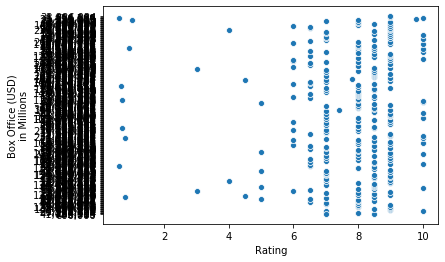

In [23]:
ax = sns.scatterplot(group_id_max.rating_x,group_id_max.box_office, data=group_id_max);
plt.xlabel('Rating')
plt.ylabel('Box Office (USD)\nin Millions');
plt.rcParams.update({'font.size': 15})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = 'bold';

##### It's interesting that low earning movies(i.e. low on box offices) are sporadic across. It's given that the box office isn't necessarily indiciative of the movie's quality. Nonetheless, it almost seems to carry no weight when assessing the box office success. Let's visualize this a bit more.

In [24]:
merged_df.box_office = merged_df.box_office.str.replace(',','')

In [25]:
group_id_max.box_office = group_id_max.box_office.str.replace(',','')

In [26]:
group_id_max.box_office = group_id_max.box_office.astype('int64')

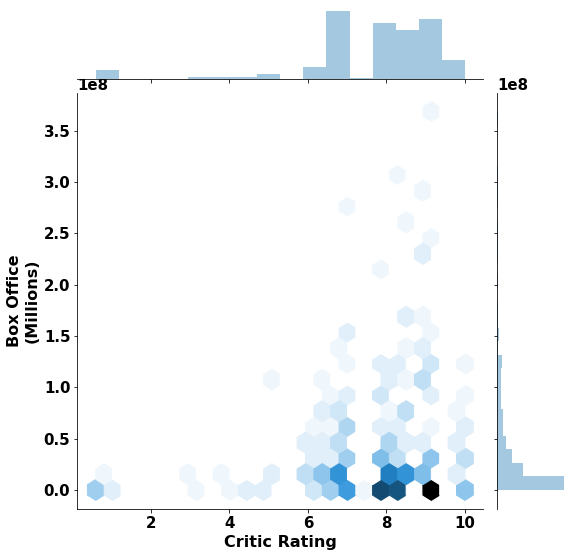

In [27]:
jointplot_rating_box = sns.jointplot(group_id_max.rating_x, group_id_max.box_office, data=group_id_max, kind='hex',height=8)
jointplot_rating_box.set_axis_labels('Critic Rating', 'Box Office\n(Millions)', fontsize=16);

#### Now that's more interesting. It's clear that the most movies fall within the critic ratings between 6 and 9, but actually make less than .5 million. Multivariate analysis is a must, but within the scope of the data, I'll approach to genre specific.

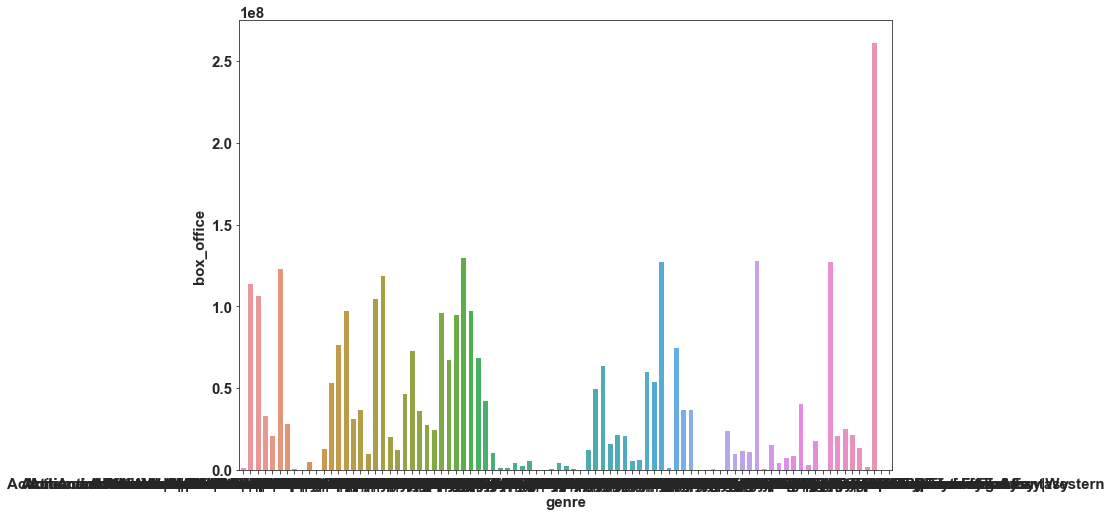

In [28]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
barplot_by_genre = sns.barplot(x=group_id_max.groupby('genre').mean().index,
                               y=group_id_max.groupby('genre')['box_office'].mean(),
                              ax=ax);  

#### lol that's not telling me much.

# Refining the list
## Key assumption: the genre mentioned foremost is its primary genre.

In [29]:
group_id_max.groupby('genre')['box_office'].mean()

genre
Action and Adventure                                                   1526248.0
Action and Adventure|Animation|Comedy                                114053579.0
Action and Adventure|Animation|Comedy|Drama|Kids and Family          106604314.0
Action and Adventure|Animation|Comedy|Kids and Family                 33636018.5
Action and Adventure|Animation|Comedy|Science Fiction and Fantasy     21379315.0
                                                                        ...     
Horror|Mystery and Suspense|Science Fiction and Fantasy               14149065.5
Kids and Family|Musical and Performing Arts                            2027042.0
Kids and Family|Science Fiction and Fantasy                          261835892.0
Mystery and Suspense                                                    262586.0
Mystery and Suspense|Science Fiction and Fantasy|Western                709133.0
Name: box_office, Length: 89, dtype: float64

In [30]:
group_id_max[group_id_max['genre'] == 'Kids and Family|Science Fiction and Fantasy']

,rating_x,fresh,top_critic,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,,,,,
1442,8.5,rotten,1,"September 30, 2005",Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,"Nov 15, 2002","Apr 11, 2003",$,261835892,161 minutes,Warner Bros. Pictures


##### Harry Potter has a potential to create a disproportionate bar. Will place it under 'Misc' and basically kill it when it comes to barplot

In [31]:
for x in group_id_max.genre:
    if x.startswith('Action and Adventure'):
        group_id_max.genre.replace(to_replace=x,value='Action\nAdventure',inplace=True)

In [32]:
for x in group_id_max.genre:
    if x.startswith('Drama'):
        group_id_max.genre.replace(to_replace=x,value='Drama',inplace=True)

In [33]:
for x in group_id_max.genre:
    if x.startswith('Comedy'):
        group_id_max.genre.replace(to_replace=x,value='Comedy',inplace=True)

In [34]:
for x in group_id_max.genre:
    if x.startswith('Art House and International'):
        group_id_max.genre.replace(to_replace=x,value='Art House\nInternational',inplace=True)

In [35]:
for x in group_id_max.genre:
    if x.startswith('Horror'):
        group_id_max.genre.replace(to_replace=x,value='Horror',inplace=True)

In [36]:
for x in group_id_max.genre:
    if x.startswith('Animation'):
        group_id_max.genre.replace(to_replace=x,value='Animation',inplace=True)

In [37]:
for x in group_id_max.genre:
    if x.startswith('Documentary'):
        group_id_max.genre.replace(to_replace=x,value='Documentary',inplace=True)

In [38]:
for x in group_id_max.genre:
    if (x.startswith('Mystery')) or (x.startswith('Kids and')) or (x.startswith('Classics')):
        group_id_max.genre.replace(to_replace=x,value='Misc',inplace=True)

In [39]:
merged_df.rating_x.drop(merged_df[merged_df['rating_x'] == '1-5'].index, inplace = True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [40]:
group_id_max.genre.drop(group_id_max[group_id_max.genre == 'Misc'].index, inplace=True)

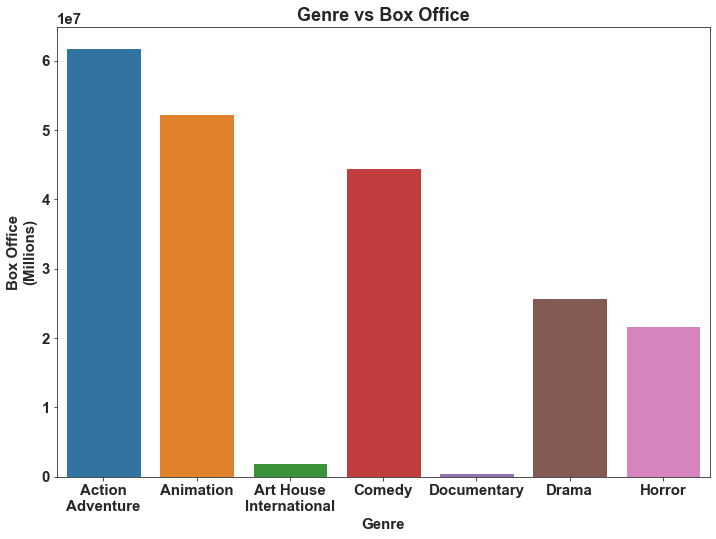

In [41]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
barplot_by_genre = sns.barplot(x=group_id_max.groupby('genre').mean().index,
                               y=group_id_max.groupby('genre')['box_office'].mean(),
                              ax=ax); 
ax.set(xlabel='Genre', ylabel='Box Office\n(Millions)',title='Genre vs Box Office')
plt.rcParams.update({'font.size': 10})

##### That's nice. Will have to compare this chart with ratings to see how this scales

[Text(0, 0.5, 'Average Max\nRating'),
 Text(0.5, 0, 'Genre'),
 Text(0.5, 1.0, 'Average Max Rating by Genre')]

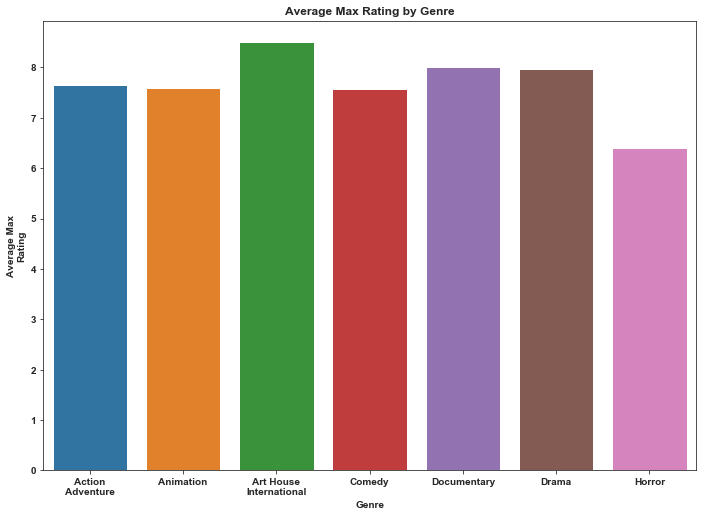

In [42]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
barplotsns = sns.barplot(x=group_id_max.groupby('genre').mean().index,
                               y=group_id_max.groupby('genre')['rating_x'].mean(),
                              ax=ax); 
ax.set(xlabel='Genre', ylabel='Average Max\nRating',title='Average Max Rating by Genre')

##### Outstanding. I love how the movies that did poorly in terms of box office, AH&Int and Documentary, are doing very well. Let's put that against the average, too.

In [43]:
grouped_mean_and_top = group_id_max.merge(group_id_mean,on='id',how='inner')

In [44]:
grouped_mean_and_top.groupby('genre')['rating_x_y'].mean()

genre
Action\nAdventure           1.546492
Animation                   1.499855
Art House\nInternational    1.891260
Comedy                      1.521093
Documentary                 1.753313
Drama                       1.669132
Horror                      0.931517
Misc                        1.438336
Name: rating_x_y, dtype: float64

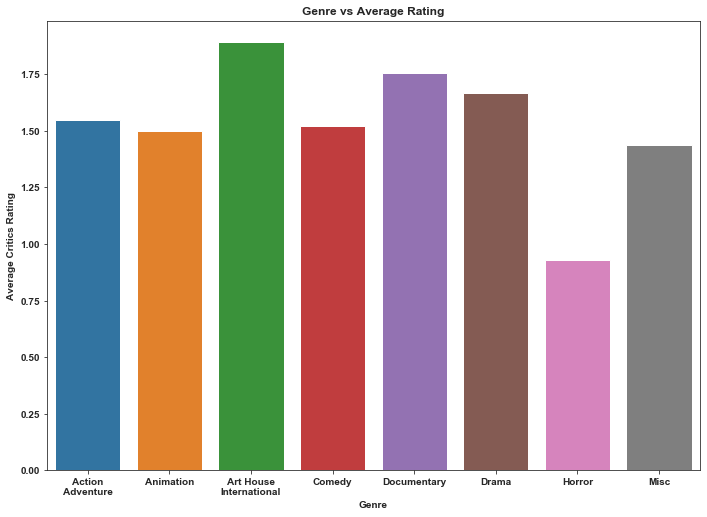

In [45]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paperg
fig.set_size_inches(11.7, 8.27)
barplot_by_genre = sns.barplot(x=grouped_mean_and_top.groupby('genre').mean().index,
                               y=grouped_mean_and_top.groupby('genre')['rating_x_y'].mean(),
                              ax=ax);  
ax.set(xlabel='Genre', ylabel='Average Critics Rating',title='Genre vs Average Rating');

##### Now that's more pronounced than the max ratings. It could be that the critics have biases towards AH&INT and Documentary, or general population have biases against them. Nonetheless something funky is going on with these two columns. Production budgets and the amount spent on non-essential/PR (i.e. advertising) would be the next step I would consider instinctively. Those, however, are not provided from Rotten Tomatoes API. I will conclude my analysis at this point.

## Conclusion:
 - Box office scores are not something we should consider when deciding which movie to watch. 
 - Art House and internation & Documentary are great in terms of ratings but it should be considered at caution.
 - *it's a speculative at this time, but it's glaringly obvious that Action&Adventure and Animation do great in theaters.

## For future investigations
 - Acquire datasets for productions and non-essential/PR costs.